# Applied Statistics Lab 3

### Question 1:

Central Limit Theorem (3 marks). Student’s t(k) distribution is a well-known (it is implemented in
scipy) but quite complicated family of probability distributions parametrized by a real number k > 0.
There is no closed-form expression for the probability distribution

 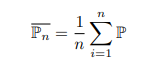

when P is a Student distribution (unlike the case of the Normal distribution which you covered in the last
lab). In this exercise, you will use the Central Limit Theorem (CLT) to approximate this distribution.
The CLT states that for sufficiently large values of N, the sample mean of N independent and identically
distributed t-distributions t(k) (where k is a parameter of the distribution called degrees of freedom) is
approximately given by a Normal Distribution with mean µ(t(k)) = 0 and variance

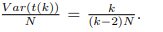

Follow these steps:
(a) Create a 2-by-3 array of subplots. Fix k = 3 and instantiate an array N = [5, 10, 30] and a variable
size = 100, 000.
(b) Using a for loop, for each value n in N sample a size × n array of samples from the distribution t(k)
(c) Compute the sample average along each row (i.e. you should get size sample averages), and plot
their histogram in a subplot.
(d) Over the histogram (i.e. in the same subplot), plot the approximate density of the distribution of
sample averages which is given by the CLT as described above.
(e) In a separate subplot, display the QQ plot of the sample means versus their approximate distribution
For which value N is the approximate density of sample means given by the CLT a good approximation
of the actual distribution from which you’ve drawn samples? Briefly justify your answer.


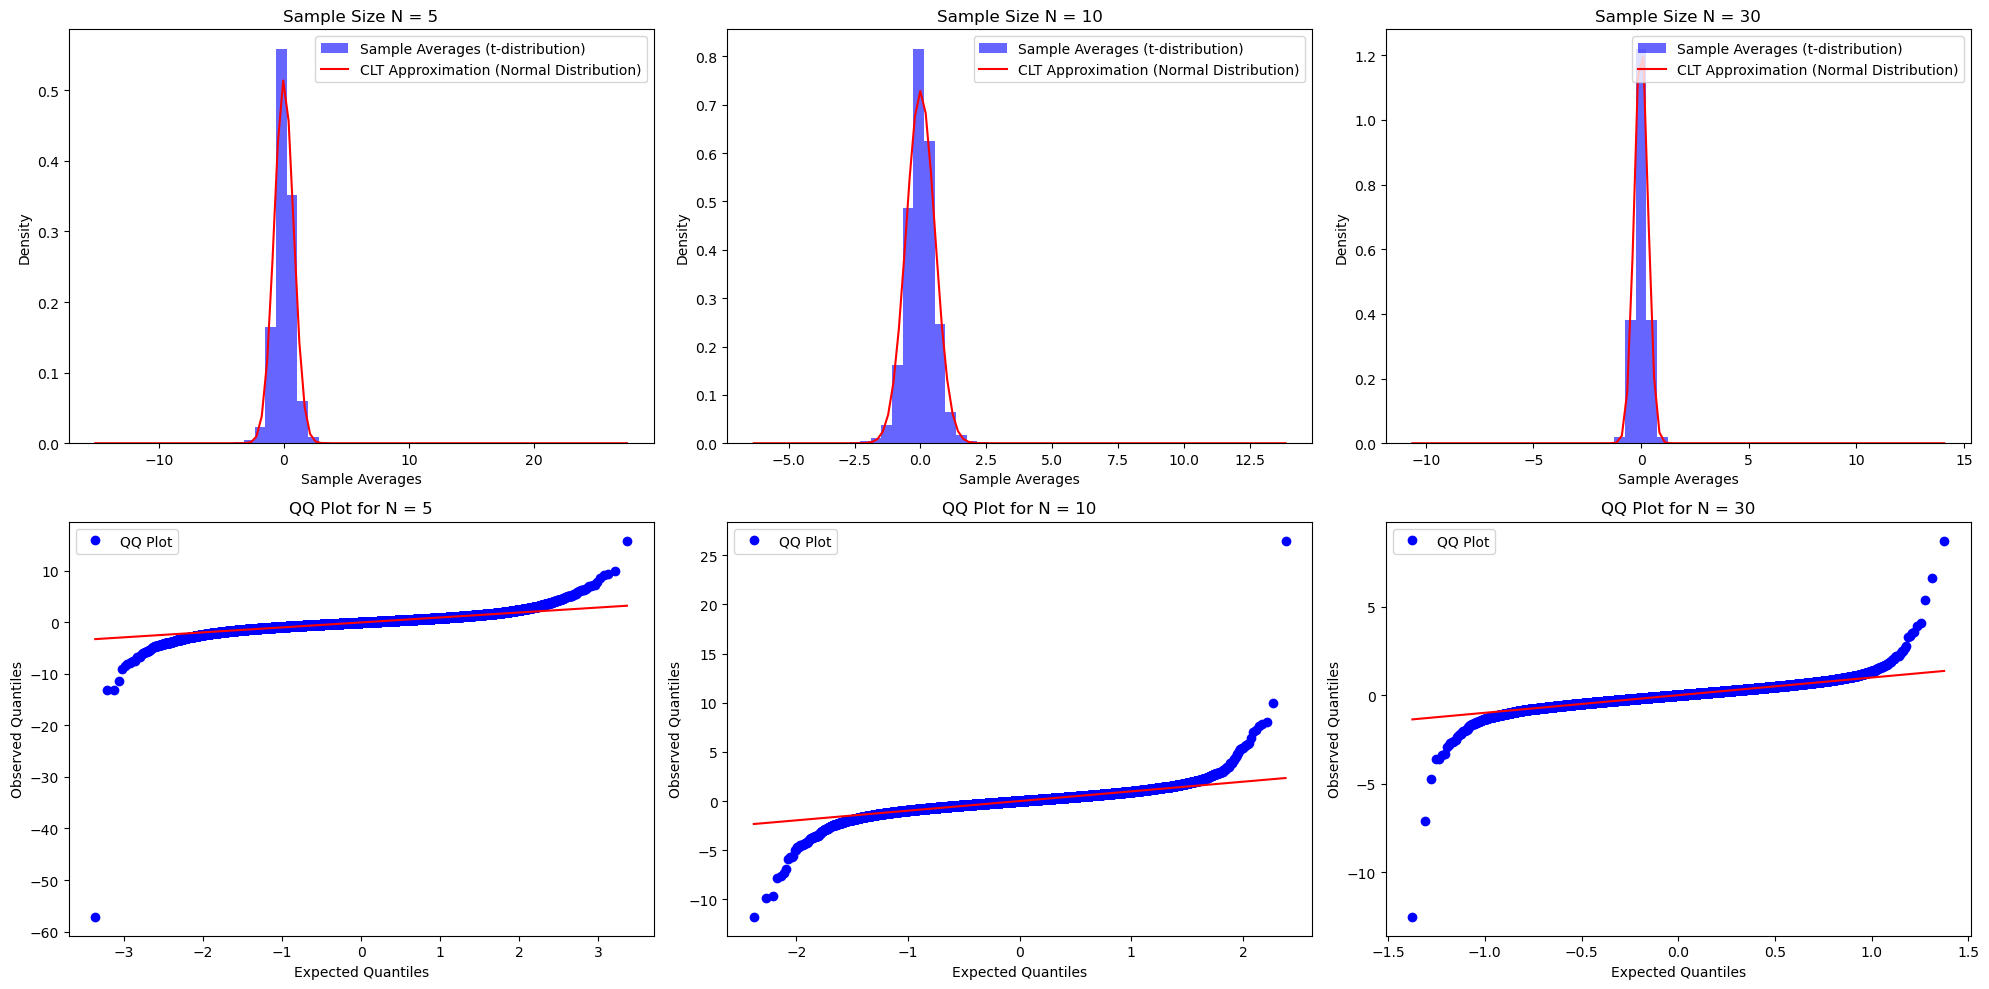

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, probplot

# Let us set the degrees of freedom parameter that is as given to be k = 3.
k = 3

# Let us create a 2-by-3 array of subplots, with a fixed k = 3 and instantiate an array N = [5, 10, 30] and a variable size = 100,000.
N = [5, 10, 30]
size = 100000
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Let us convert the 2-by-3 2D array into 1D array, so that the iterations are easy.
axes = axes.flatten()

# Let us now sample a size × n array of samples from the distribution t(k). This is to be done for each value n in N.
for i, n in enumerate(N):
    sample_means = np.zeros((size, n))
    for j in range(size):
        sample_means[j, :] = t.rvs(k, size=n)

    # Let us now plot the histograms of the sample averages along each row in a subplot.
    row_averages = np.mean(sample_means, axis=1)
    axes[i].hist(row_averages, bins=50, density=True, alpha=0.6, color='b', label='Sample Averages (t-distribution)')

    # The CLT over the plotted histograms can be given as follows:
    clt_mean = 0
    clt_std = np.sqrt(k / ((k - 2) * n))
    x = np.linspace(min(row_averages), max(row_averages), 100)
    axes[i].plot(x, norm.pdf(x, loc=clt_mean, scale=clt_std), 'r', label='CLT Approximation (Normal Distribution)')

    # Set titles and labels
    axes[i].set_title(f'Sample Size N = {n}')
    axes[i].set_xlabel('Sample Averages')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# QQ plot of the sample means versus their approximate distribution
for i, n in enumerate(N):
    row_averages = np.mean(t.rvs(k, size=(size, n)), axis=1)
    qq_axes = plt.subplot(2, 3, i+4)  # Start plotting from the 4th subplot
    probplot(row_averages, dist=norm(loc=0, scale=np.sqrt(k / ((k - 2) * n))), plot=qq_axes, fit=True)
    qq_axes.set_title(f'QQ Plot for N = {n}')
    qq_axes.set_xlabel('Expected Quantiles')
    qq_axes.set_ylabel('Observed Quantiles')
    qq_axes.legend(['QQ Plot'])

plt.tight_layout()
plt.show()


In order to answer the question that "For which value N is the approximate density of sample means given by the CLT a good approximation of the actual distribution from which you’ve drawn samples?", we will need to observe the plotted histograms along with their CLT curves, and the QQ plots along with thier diagonals for each N value.

1) Observations on Histograms and the corresponding CLT curves:
    We can see that the histograms that show the sample means of each row, are not properly aligned with the CLT curve for N = 5 and N = 10. But, for N = 30, the CLT curve is properly aligned with its corresponding histograms of the sample means. Even though the histograms appear to be symmetric, but due to some skewness they are not aligned with the CLT curve.
    
2) Obeservations on QQ plots and the corresponding diagonals:
    We can see the similar thing in QQ plots as well. The QQ plots for N = 5 and N = 10 have many deviations in terms of the sample means from their corresponding diagonals. But, in the case of N = 30, if compaired with the rest of the 2 N values, the deviations in terms of the sample means is less.
    
We are trying to find out the "good approximation" of the actual actual ditributions from where we have collected the samples. This can be indicated by how well the sample means distribution is aligned with the distribution predicted by the CLT. 

So, based on our observations, N = 30 appears to be the value for which the approximate density of sample means which is given by the CLT distribution as well as the distribution in QQ plot along its diagonal is a better approximation of the actual distribution. We found this because, the QQ plot is showing lesser deviation from the diagonal and the CLT curve also aligns with the corresponding histograms for N = 30.

### Question 2:

Download the Dow Jones Industrial Average from Stooq using the following code. Do NOT make any local copies of your data!

import pandas_datareader . data a s web

data = web.DataReader ( ’^DJI ’ , ’ stooq ’ , start=’ 1995−01−01 ’ , end=’2023−11−14 ’ )
data = data.reset_index( )
dates = data ["Date"]
dow = data ["Close"].to_numpy( )


(a) Plot this times series.

(b) Compute the time series of (percentage) daily returns using the formula

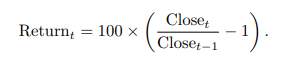

(c) Compute the length-n sample averages of daily returns, starting at the first datapoint, for every n ≥ 100. Thus the first datapoint in this time series will be the average of the first 100 daily returns, the second will be the average of the first 101 daily returns, etc., and the last will be the average of all daily returns. Plot this timeseries. Does it look like it obeys the weak Law of Large Numbers? If yes explain why, if not explain why this might be the case.

(d) Compute the length-100 rolling averages of daily returns. Plot a histogram of these sample averages. Repeat with length-400 rolling averages. Does it look like these obey the Central Limit Theorem? If yes explain why, if not explain why this might be the case.

(e) Compute the sample mean, variance, skewness and kurtosis of the daily returns. Based on this information, suggest which family of distributions might model these daily returns. Briefly justify your choice.

(f) For this choice of family, you will now estimate the parameter(s) which best explain the data using the Maximum Likelihood Estimator approach. To achieve this:

• Implement the function which needs to be maximized (this was explained in the lectures). The parameter(s) which you are trying to estimate must of course be inputs to this function.
• Using the minimize function from scipy.optimize, find the optimal parameters. (Hint: maximizing f(x) is the same thing as minimizing −f(x)). You can use any of the actual minimization methods, as long as it gives you a sensible answer.
• Once you have found the optimal parameters, plot the PDF of your optimal distribution against a histogram of the daily returns.

(g) Check the results you obtained in the previous step by comparing it with the parameters you obtain from scipy’s fit function. Again, plot the PDF of the distribution with these parameters against a histogram of the daily returns.


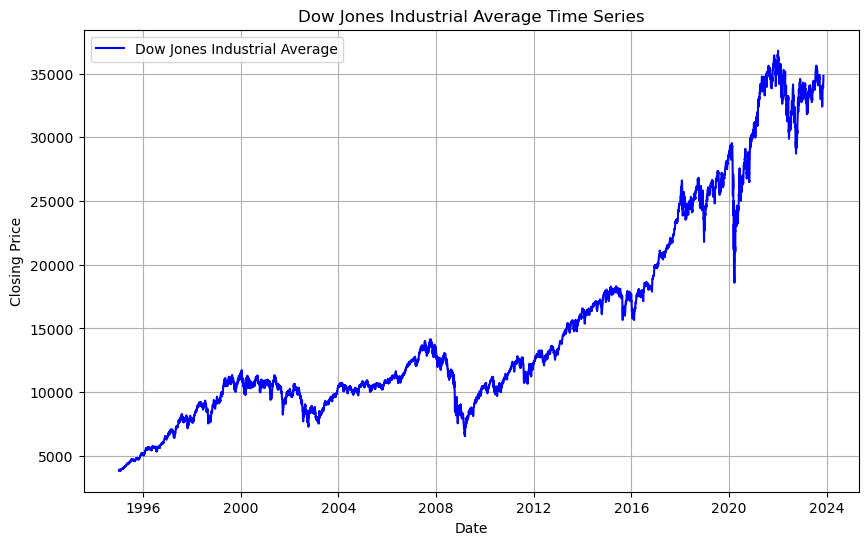

In [2]:
import pandas_datareader as web
import matplotlib.pyplot as plt

# Download Dow Jones Industrial Average from Stooq
data = web.DataReader('^DJI', 'stooq', start='1995-01-01', end='2023-11-14')
data = data.reset_index()

# Extract dates and closing prices
dates = data["Date"]
dow = data["Close"].to_numpy()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(dates, dow, label='Dow Jones Industrial Average', color='blue')
plt.title('Dow Jones Industrial Average Time Series')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


The above plot shows the time series of the Dow Jones Industrial Average from Stooq data.

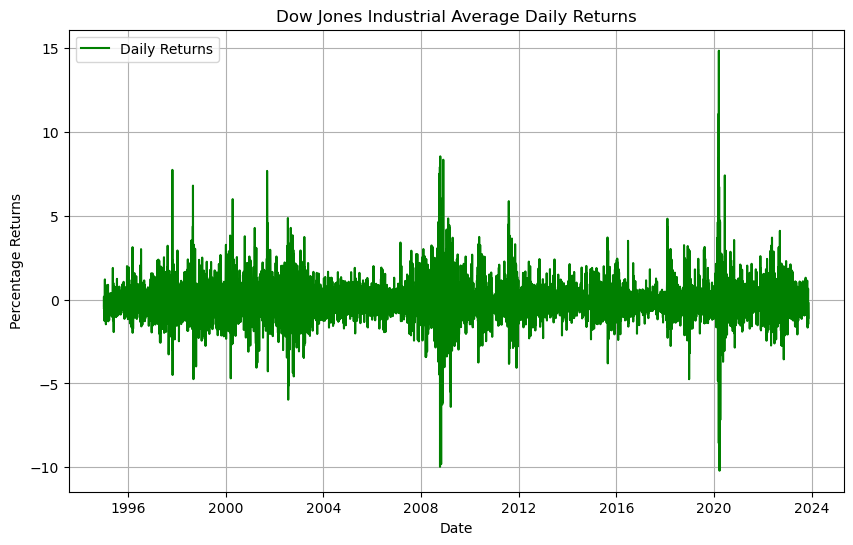

In [3]:
# Compute daily returns
data['Return'] = 100 * ((data['Close'] / data['Close'].shift(1)) - 1)

# Plot the daily returns
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Return'], label='Daily Returns', color='green')
plt.title('Dow Jones Industrial Average Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Returns')
plt.legend()
plt.grid(True)
plt.show()

The above plot is the visual representation of the daily percentage returns.

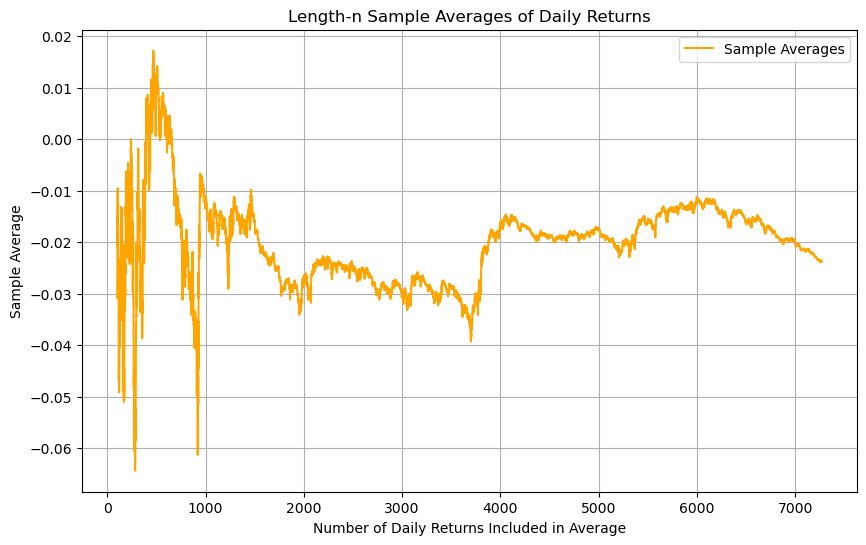

In [4]:
# Initialize an empty list to store the sample averages
sample_averages = []

# Compute sample averages for every n ≥ 100
for n in range(100, len(data) + 1):
    sample_average = data['Return'].iloc[:n].mean()
    sample_averages.append(sample_average)

# Plot the time series of sample averages
plt.figure(figsize=(10, 6))
plt.plot(range(100, len(data) + 1), sample_averages, label='Sample Averages', color='orange')
plt.title('Length-n Sample Averages of Daily Returns')
plt.xlabel('Number of Daily Returns Included in Average')
plt.ylabel('Sample Average')
plt.legend()
plt.grid(True)
plt.show()


Here we need to specify that whether the plotted time series, obeys the weak Law of Large Numbers or not. In order to determine that, we need to observe the plotted graph.

In LLN, the sample mean converges in the probability to the population mean, as the sample size increase. This means that if the sample averages converges to a value when the number of daily returns included in the average is increased. 

In our plot, we can see that the sample averages is trying to be converged at a single value. So, we can say that our plot obeys the weak Law of Large Numbers.

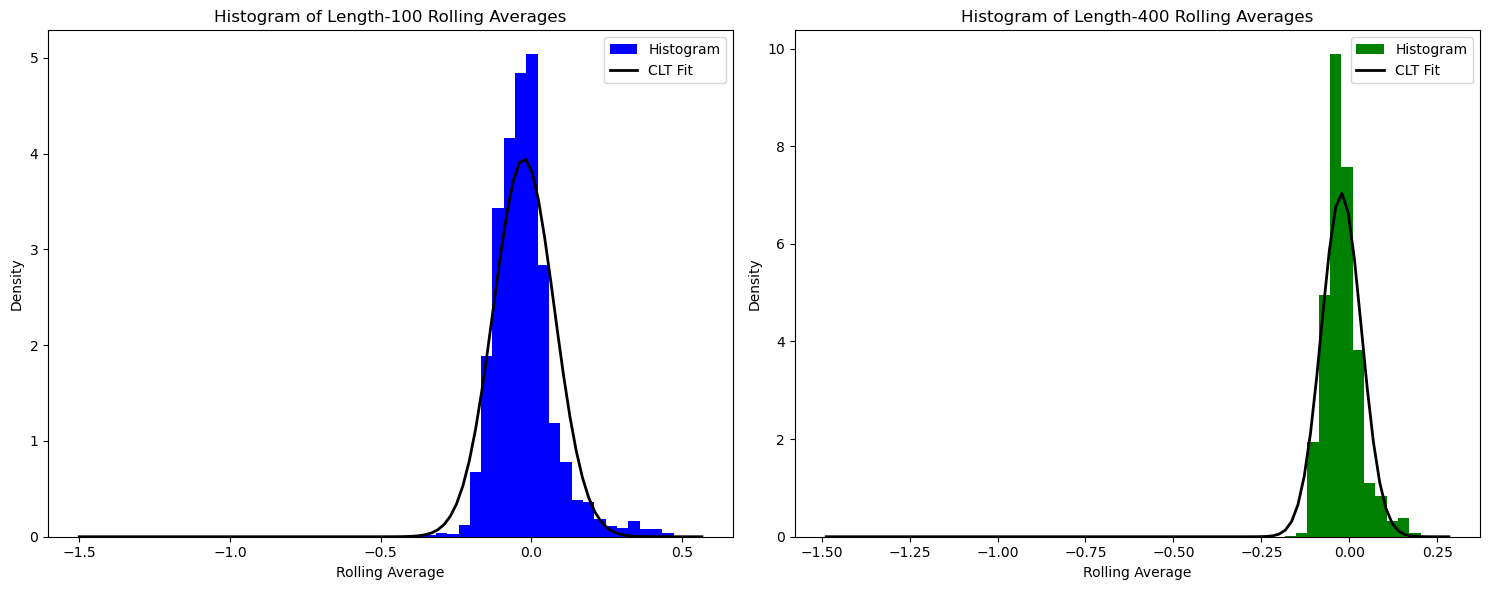

In [5]:
# Compute rolling averages
rolling_average_100 = data['Return'].rolling(window=100, min_periods=1).mean()
rolling_average_400 = data['Return'].rolling(window=400, min_periods=1).mean()

# Plot histograms of rolling averages with CLT fit
plt.figure(figsize=(15, 6))

# Histogram for length-100 rolling averages
plt.subplot(1, 2, 1)
plt.hist(rolling_average_100.dropna(), bins=50, density=True, color='blue', label='Histogram')
mean_100, std_100 = rolling_average_100.mean(), rolling_average_100.std()
xmin_100, xmax_100 = plt.xlim()
x_100 = np.linspace(xmin_100, xmax_100, 100)
p_100 = norm.pdf(x_100, mean_100, std_100)
plt.plot(x_100, p_100, 'k', linewidth=2, label='CLT Fit')
plt.title('Histogram of Length-100 Rolling Averages')
plt.xlabel('Rolling Average')
plt.ylabel('Density')
plt.legend()

# Histogram for length-400 rolling averages
plt.subplot(1, 2, 2)
plt.hist(rolling_average_400.dropna(), bins=50, density=True, color='green', label='Histogram')
mean_400, std_400 = rolling_average_400.mean(), rolling_average_400.std()
xmin_400, xmax_400 = plt.xlim()
x_400 = np.linspace(xmin_400, xmax_400, 100)
p_400 = norm.pdf(x_400, mean_400, std_400)
plt.plot(x_400, p_400, 'k', linewidth=2, label='CLT Fit')
plt.title('Histogram of Length-400 Rolling Averages')
plt.xlabel('Rolling Average')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

In order to determine whether the histograms of the sample averages obey the Central Limit Theorem or not, we have plotted the CLT curve to determine whether the histograms are aligned properly with the CLT and approaces the normal distribution or not.

From our plots, we can observe that the CLT curve is not properly aligned with their corresponding histograms. Even though the histograms look like they are symmetric, but due to some skewness, they are not aligned with the normal distribution.

So, we can say that, the histograms of the sample averages do not obey the CLT.

In [6]:
from scipy.stats import skew, kurtosis

# Calculate sample statistics
mean_return = np.mean(data['Return'])
variance_return = np.var(data['Return'], ddof=1)  # Use ddof=1 for sample variance
skewness_return = skew(data['Return'], nan_policy='omit')  # Omit NaN values for skewness calculation
kurtosis_return = kurtosis(data['Return'], nan_policy='omit')  # Omit NaN values for kurtosis calculation

# Print the results
print(f"Sample Mean: {mean_return:}")
print(f"Sample Variance: {variance_return:}")
print(f"Skewness: {skewness_return:}")
print(f"Kurtosis: {kurtosis_return:}")


Sample Mean: -0.0237229554101248
Sample Variance: 1.3282496804110582
Skewness: 0.6480631209171596
Kurtosis: 12.97781454831144


Here, we have to specify that which family of distributions might model these daily returns. Let us understand the values of sample mean, sample variance, skewness and kurtosis.

1) Sample Mean:
    We can gather the information about the central tendancy of the distribution by computing the sample mean. If the mean is zero, then it suggests that there is a symmetric distribution. In our case, the mean is negative and slightly less that zero, which means that the distribution has some skewness. This negative mean shows that the average daily returns is slightly below zero. 
    
2) Sample Variance:
    We can measure the spread or the dispersion of the data by computing sample variance. In our case we will be measuring the spread of daily returns. The variance we computed is a moderate one, which will give out the degree of variability. 
    
3) Skewness:
    In the computation of the sample mean, we have observed that there is some skewness in the distribution.Now let us see that whether the skewness is positive or negative. After computation of the value of skewness, we can observe that there is a positive skewness in the distribution. This means that the distribution has its tails on the right side of the distribution. 
    
4) Kurtosis:
    From the skewness we have understood that the distribution has tails on the right side. Now let us look at the tails are lighter or heavy by computing the kurtosis. The value of kurtosis we achived is too high, which suggests that the distribution is having heavy tails. This means that the distribution has fat tails which suggests that the extream events are more likely to take place.
    
By observing these, we can see that the distribution is asymmetric, has tails on the right side of the distribution, the tails are fat and also the average daily returns is less that zero. 

So, in order to capture the heavy and fat tails on the right side of the distribution, we will need some kind of skewed distributions like Student's t-distribution or Cauchy Distribution.

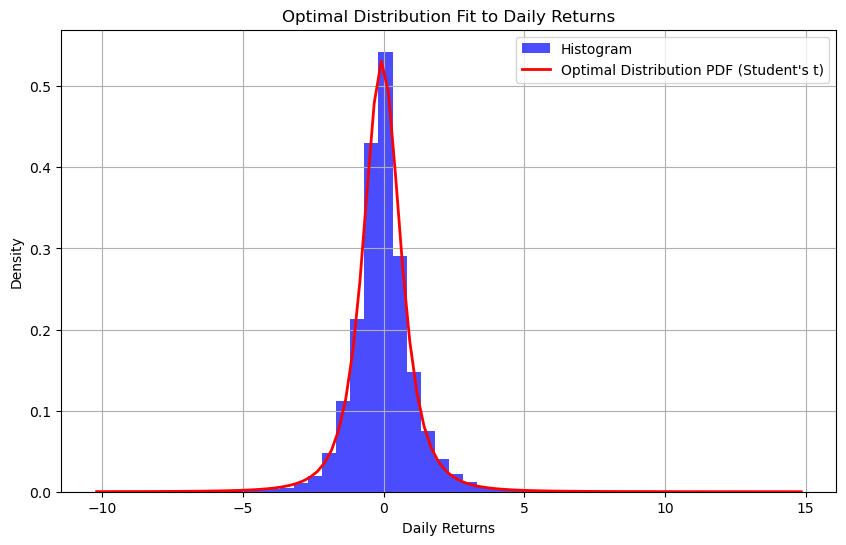

In [8]:
from scipy.stats import t
from scipy.optimize import minimize

# Compute daily returns as a variable
returns = 100 * ((data['Close'] / data['Close'].shift(1)) - 1)
returns = returns.dropna()

# Chosen distribution: Student's t-distribution
def neg_log_likelihood(params):
    df, loc, scale = params
    dist = t(df, loc, scale)
    log_likelihood = np.sum(np.log(dist.pdf(returns)))
    return -log_likelihood

# Initial guess for parameters
initial_params = [3, 0, 1]  # Starting with df=3 is common for Student's t-distribution

# Minimize the negative log-likelihood
result = minimize(neg_log_likelihood, initial_params, method='BFGS')

# Extract optimal parameters
optimal_params = result.x

# Plot PDF of optimal distribution against histogram
plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(returns, bins=50, density=True, alpha=0.7, color='blue', label='Histogram')

# Plot PDF of optimal distribution
optimal_dist = t(*optimal_params)
x = np.linspace(returns.min(), returns.max(), 100)
plt.plot(x, optimal_dist.pdf(x), 'r', linewidth=2, label='Optimal Distribution PDF (Student\'s t)')

plt.title('Optimal Distribution Fit to Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Here we have performed the Maximum Likelihood Estimation to find the best-fitting parameters to model a set of observed daily returns, by using Student's t-distribution.

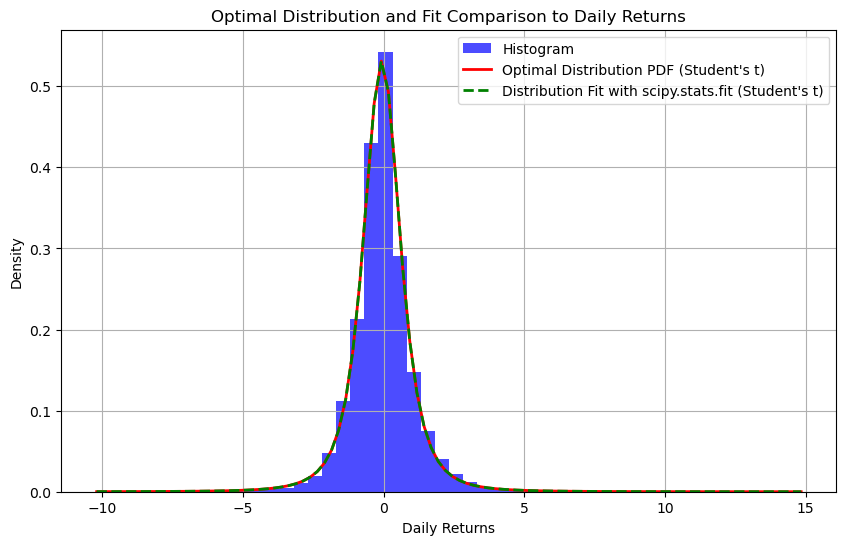

In [9]:
# Chosen distribution: Student's t-distribution
def neg_log_likelihood(params):
    df, loc, scale = params
    dist = t(df, loc, scale)
    log_likelihood = np.sum(np.log(dist.pdf(returns)))
    return -log_likelihood

# Initial guess for parameters
initial_params = [3, 0, 1]  # Starting with df=3 is common for Student's t-distribution

# Minimize the negative log-likelihood
result = minimize(neg_log_likelihood, initial_params, method='BFGS')

# Extract optimal parameters
optimal_params = result.x

# Fit distribution using scipy.stats.fit
fit_params = t.fit(returns)

# Plot PDF of optimal distribution against histogram
plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(returns, bins=50, density=True, alpha=0.7, color='blue', label='Histogram')

# Plot PDF of optimal distribution (Student's t)
optimal_dist = t(*optimal_params)
x = np.linspace(returns.min(), returns.max(), 100)
plt.plot(x, optimal_dist.pdf(x), 'r', linewidth=2, label='Optimal Distribution PDF (Student\'s t)')

# Plot PDF of distribution using scipy.stats.fit
fit_dist = t(*fit_params)
plt.plot(x, fit_dist.pdf(x), 'g', linestyle='dashed', linewidth=2, label='Distribution Fit with scipy.stats.fit (Student\'s t)')

plt.title('Optimal Distribution and Fit Comparison to Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Here, we need to compaire the fit distribution with the Maximum Likelihood Estimation. We can see that both are getting overlapped. Let us compaire the parameter values in order to determine whether both Optimal Distribution PDF and Distribution Fit with scipy.stats.fit curves are overlapping or not.

In [10]:
print("Optimal Parameters (MLE):", optimal_params)
print("Fit Parameters (scipy.stats.fit):", fit_params)

Optimal Parameters (MLE): [ 2.85349068 -0.06273682  0.68881393]
Fit Parameters (scipy.stats.fit): (2.853495932310387, -0.06274107728130038, 0.6888110968432781)


Here we can see that both the parameter values are quite close to one another and when plotted can be seen to get overlapped. This is always the case whenever the data is well-behaved and the optimization process converges to a global minimum. We can still see a very small difference between the parameter values which is due to the behaviour of the optimisation process.